### Question: When during the day is most dangerous?

Let's see how accidents are splitted based on the place of the event and see where we can feel to be the safest.

First step before any data analysis is to import required libraries and data. Any information required to understand columns is available here: https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

dataset = pd.read_csv('data/caracteristics.csv', encoding='latin1')
dataset.head()

D:\Programy\anaconda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


Let's check the 'lum' column and change the values there.
* 1 - Full day
* 2 - Twilight or dawn
* 3 - Night without public lighting
* 4 - Night with public lighting not lit
* 5 - Night with public lighting on

But first check if there are a missing values in column that we want to work on.

In [2]:
dataset.columns[dataset.isna().sum() != 0]

Index(['atm', 'col', 'com', 'adr', 'gps', 'lat', 'long'], dtype='object')

Now, let's change the 'lum' column to be more understandable by humans.

In [3]:
dataset['lum'] = dataset['lum'].astype(str) 
dataset['lum'] = dataset['lum'].replace({'2': 'Twilight or dawn', '1': 'Full day', '3': 'Night no public lighting', '4': 'Night lighting not lit', '5': 'Night with public lighting on'})

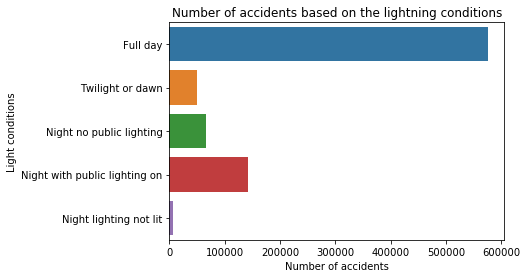

In [4]:
plt.clf()
ax = sns.countplot(y = 'lum', data=dataset)
ax.set_title('Number of accidents based on the lightning conditions')
ax.set_xlabel('Number of accidents')
ax.set_ylabel('Light conditions')
plt.show()

Now let's see summarization when during all that years there was the highest number of accidents. First let's check what type is in 'hrmn' column which represents combined hour and minutes.

In [5]:
dataset.dtypes

Num_Acc      int64
an           int64
mois         int64
jour         int64
hrmn         int64
lum         object
agg          int64
int          int64
atm        float64
col        float64
com        float64
adr         object
gps         object
lat        float64
long        object
dep          int64
dtype: object

Ceate new column 'hr' where we'll put only hour of accident in 24 hour format.

In [6]:
dataset['hr'] = dataset['hrmn']/100
dataset['hr'] = dataset['hr'].astype('int64')
dataset.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,hr
0,201600000001,16,2,1,1445,Full day,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590,14
1,201600000002,16,3,16,1800,Full day,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590,18
2,201600000003,16,7,13,1900,Full day,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590,19
3,201600000004,16,8,15,1930,Twilight or dawn,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590,19
4,201600000005,16,12,23,1100,Full day,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590,11


<Figure size 432x288 with 0 Axes>

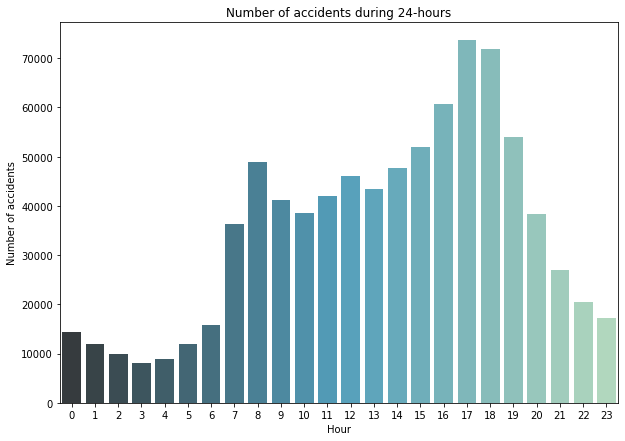

In [16]:
plt.clf()
plt.figure(figsize=(10,7))
ax = sns.countplot(x='hr', data=dataset, palette="GnBu_d")
ax.set_title('Number of accidents during 24-hours')
ax.set_xlabel('Hour')
ax.set_ylabel('Number of accidents')
plt.show()

It looks like the most of accidents are happening during the day, with two peaks. First peak is between 8:00 and 9:00 and second between 17:00 and 18:00.